# Datasets and Lib..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
path = ''
df = pd.read_csv(path+'dummy.csv',index_col = 0)
df.fillna(0,inplace = True)
df.head()

,id,trigger number,was followed,delay,e,n_date,n_hour,n_day,f_date,f_hour,f_day,group,send_time,viewed_time,age,gender,qual
0,1,1,1.0,803,1,2014-10-13,12,Mon,2014-10-13,12,Mon,Intelligent,12:19:24,12:32:00,48.0,Female,Degree
1,1,2,1.0,2401,1,2014-10-13,18,Mon,2014-10-13,18,Mon,Intelligent,18:04:42,18:44:00,48.0,Female,Degree
2,1,3,0.0,0,1,2014-10-14,11,Tue,1970-01-01,0,Thu,Intelligent,11:12:25,0,48.0,Female,Degree
3,3,1,1.0,9852,1,2014-08-10,20,Sun,2014-08-10,23,Sun,Occasional,20:16:28,23:00:00,42.0,Male,GCSEs / O levels or similar
4,3,2,0.0,0,1,2014-11-10,20,Mon,1970-01-01,0,Thu,Occasional,20:09:49,0,42.0,Male,GCSEs / O levels or similar


## Settings things up !

In [3]:
# $#!| we are dealing with
print('Number of samples in each class.\n')
print('===================================')
print(df['was followed'].value_counts())
print('===================================')

print('\nDetailed')
print('*-*-*-*-**-*-*-*-**-*-*-*-**-*-*-*-*')
c1 = df['group'] == 'Intelligent'
c2 = df['group'] == 'Daily'
c3 = df['group'] == 'Occasional'

print('Intelligent : \n{}\n'.format(df[c1]['was followed'].value_counts()))
print('===================================')

print('Daily : \n{}\n'.format(df[c2]['was followed'].value_counts()))
print('===================================')

print('Occasional : \n{}\n'.format(df[c3]['was followed'].value_counts()))
print('===================================')

df['group'].value_counts()

Number of samples in each class.

0.0    4531
1.0     782
Name: was followed, dtype: int64

Detailed
*-*-*-*-**-*-*-*-**-*-*-*-**-*-*-*-*
Intelligent : 
0.0    1114
1.0     216
Name: was followed, dtype: int64

Daily : 
0.0    2323
1.0     335
Name: was followed, dtype: int64

Occasional : 
0.0    927
1.0    204
Name: was followed, dtype: int64



Daily          2658
Intelligent    1330
Occasional     1131
0               194
Name: group, dtype: int64

In [ ]:
# NaN


## ()

In [4]:

data = pd.concat([df[df['was followed'] == 1.0],df[df['was followed'] == 0.0].sample(700)])

In [5]:
data['was followed'].value_counts()

1.0    782
0.0    700
Name: was followed, dtype: int64

In [6]:
data.head()

,id,trigger number,was followed,delay,e,n_date,n_hour,n_day,f_date,f_hour,f_day,group,send_time,viewed_time,age,gender,qual
0,1,1,1.0,803,1,2014-10-13,12,Mon,2014-10-13,12,Mon,Intelligent,12:19:24,12:32:00,48.0,Female,Degree
1,1,2,1.0,2401,1,2014-10-13,18,Mon,2014-10-13,18,Mon,Intelligent,18:04:42,18:44:00,48.0,Female,Degree
3,3,1,1.0,9852,1,2014-08-10,20,Sun,2014-08-10,23,Sun,Occasional,20:16:28,23:00:00,42.0,Male,GCSEs / O levels or similar
5,3,3,1.0,44,1,2014-10-14,19,Tue,2014-10-14,19,Tue,Occasional,19:56:32,19:57:00,42.0,Male,GCSEs / O levels or similar
6,3,4,1.0,10654,1,2014-10-17,19,Fri,2014-10-17,21,Fri,Occasional,19:00:00,21:57:00,42.0,Male,GCSEs / O levels or similar


In [ ]:
# distinguish between send day and view day 
'''temp_d = {'Mon':'Mon_f','Tue':'Tue_f','Wed': 'Wed_f','Thu':'Thu_f','Fri':'Fri_f','Sat':'Sat_f','Sun':'Sun_f'}
data['f_day'] = data['f_day'].map(temp_d)
'''
;

In [7]:
# adding minute column
data['send_minute']=pd.to_datetime(data['send_time']).map(lambda x:x.minute)
data['viewed_minute']=pd.to_datetime( data[data['was followed']==1.0]['viewed_time']).map(lambda x:x.minute)
data.head()

,id,trigger number,was followed,delay,e,n_date,n_hour,n_day,f_date,f_hour,f_day,group,send_time,viewed_time,age,gender,qual,send_minute,viewed_minute
0,1,1,1.0,803,1,2014-10-13,12,Mon,2014-10-13,12,Mon,Intelligent,12:19:24,12:32:00,48.0,Female,Degree,19,32.0
1,1,2,1.0,2401,1,2014-10-13,18,Mon,2014-10-13,18,Mon,Intelligent,18:04:42,18:44:00,48.0,Female,Degree,4,44.0
3,3,1,1.0,9852,1,2014-08-10,20,Sun,2014-08-10,23,Sun,Occasional,20:16:28,23:00:00,42.0,Male,GCSEs / O levels or similar,16,0.0
5,3,3,1.0,44,1,2014-10-14,19,Tue,2014-10-14,19,Tue,Occasional,19:56:32,19:57:00,42.0,Male,GCSEs / O levels or similar,56,57.0
6,3,4,1.0,10654,1,2014-10-17,19,Fri,2014-10-17,21,Fri,Occasional,19:00:00,21:57:00,42.0,Male,GCSEs / O levels or similar,0,57.0


In [8]:
# for general model not personalized, as not trained uniquely for each user. [ME]

data.drop(['trigger number','e','f_date','n_date','send_time','viewed_time'],axis = 1,inplace=True)
data.head()

,id,was followed,delay,n_hour,n_day,f_hour,f_day,group,age,gender,qual,send_minute,viewed_minute
0,1,1.0,803,12,Mon,12,Mon,Intelligent,48.0,Female,Degree,19,32.0
1,1,1.0,2401,18,Mon,18,Mon,Intelligent,48.0,Female,Degree,4,44.0
3,3,1.0,9852,20,Sun,23,Sun,Occasional,42.0,Male,GCSEs / O levels or similar,16,0.0
5,3,1.0,44,19,Tue,19,Tue,Occasional,42.0,Male,GCSEs / O levels or similar,56,57.0
6,3,1.0,10654,19,Fri,21,Fri,Occasional,42.0,Male,GCSEs / O levels or similar,0,57.0


In [9]:
data[data['was followed'] == 0.0]['viewed_minute'][:3]

1301   NaN
3260   NaN
207    NaN
Name: viewed_minute, dtype: float64

In [10]:
data.reset_index(inplace = True, drop = True)

In [11]:
# Decission has to be made for threshold value. For this we would check the maximum time taken for the response..
# By intitution says -- model is becoming very shitty need something smart...
print(data[data['was followed'] == 1]['delay'].describe())
data['delay'].max()/60 # wtf # lets check that notification

count       782.000000
mean      12274.971867
std       25364.595076
min           3.000000
25%         268.750000
50%        2484.000000
75%       10279.000000
max      226807.000000
Name: delay, dtype: float64


3780.116666666667

**Question.**

Lets say if we choose 2 hours as our threshold then.. is binary label enough?
Or to overcome this we would need app specific detail..(the four classes mentioned )

**-=- Plan -=-**

First determine is the notification useful. For this dataset we would consider label '1' as useful.<br>
Then determine the time of attack.

First train the general model.<br>
Train with changing labels as in this dataset only useful things are - response time, day, time :( <br>
Do comparison with the results of NB model.

In [12]:
data.iloc[data['delay'].idxmax()]

id                                12
was followed                       1
delay                         226807
n_hour                            18
n_day                            Sat
f_hour                             9
f_day                            Tue
group                     Occasional
age                               30
gender                        Female
qual             Postgraduate degree
send_minute                        2
viewed_minute                      2
Name: 48, dtype: object

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


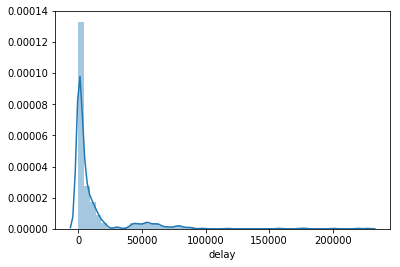

In [13]:

sns.distplot(data[data['was followed'] == 1]['delay'])


In [14]:
data.head()

,id,was followed,delay,n_hour,n_day,f_hour,f_day,group,age,gender,qual,send_minute,viewed_minute
0,1,1.0,803,12,Mon,12,Mon,Intelligent,48.0,Female,Degree,19,32.0
1,1,1.0,2401,18,Mon,18,Mon,Intelligent,48.0,Female,Degree,4,44.0
2,3,1.0,9852,20,Sun,23,Sun,Occasional,42.0,Male,GCSEs / O levels or similar,16,0.0
3,3,1.0,44,19,Tue,19,Tue,Occasional,42.0,Male,GCSEs / O levels or similar,56,57.0
4,3,1.0,10654,19,Fri,21,Fri,Occasional,42.0,Male,GCSEs / O levels or similar,0,57.0


One Hot encodings.. 
Not taking day on which it was viewed as most of them would be viewed on the same day...
Discuss it later?

In [15]:
days_send = pd.get_dummies(data['n_day'])
#seen_days = pd.get_dummies(data['f_day'])
gender = pd.get_dummies(data['gender'],drop_first=True) # left for consideration
qual = pd.get_dummies(data['qual'])

In [16]:
qual[:2]

,A levels or similar,Degree,"Diploma (non degree) e.g. HNC, HND",GCSEs / O levels or similar,No formal educational qualifications,Other,Postgraduate degree
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0


In [17]:
data = pd.concat([data,days_send,gender,qual], axis = 1)

data.head()

,id,was followed,delay,n_hour,n_day,f_hour,f_day,group,age,gender,...,Tue,Wed,Male,A levels or similar,Degree,"Diploma (non degree) e.g. HNC, HND",GCSEs / O levels or similar,No formal educational qualifications,Other,Postgraduate degree
0,1,1.0,803,12,Mon,12,Mon,Intelligent,48.0,Female,...,0,0,0,0,1,0,0,0,0,0
1,1,1.0,2401,18,Mon,18,Mon,Intelligent,48.0,Female,...,0,0,0,0,1,0,0,0,0,0
2,3,1.0,9852,20,Sun,23,Sun,Occasional,42.0,Male,...,0,0,1,0,0,0,1,0,0,0
3,3,1.0,44,19,Tue,19,Tue,Occasional,42.0,Male,...,1,0,1,0,0,0,1,0,0,0
4,3,1.0,10654,19,Fri,21,Fri,Occasional,42.0,Male,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
data.columns

In [18]:
train = data.drop(labels = ['n_day','f_day','qual','gender','group'], axis = 1)
train.head()

,id,was followed,delay,n_hour,f_hour,age,send_minute,viewed_minute,Fri,Mon,...,Tue,Wed,Male,A levels or similar,Degree,"Diploma (non degree) e.g. HNC, HND",GCSEs / O levels or similar,No formal educational qualifications,Other,Postgraduate degree
0,1,1.0,803,12,12,48.0,19,32.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1.0,2401,18,18,48.0,4,44.0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,1.0,9852,20,23,42.0,16,0.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,3,1.0,44,19,19,42.0,56,57.0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,3,1.0,10654,19,21,42.0,0,57.0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
train.columns

Kept group & id so that we could do comparisons.
Things needed content of message. App specific details and context of the phone. 
Notification type and items recomended types.
<br>
Need more details about the notification this much parameter speaks nothing need something concrete ...
like purpose...

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [20]:
X = data.drop(columns=['group','was followed','id','f_hour','viewed_minute','delay','n_day','gender','qual','f_day'])
y = data['was followed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 101)

In [21]:
X_train.head()

,n_hour,age,send_minute,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Male,A levels or similar,Degree,"Diploma (non degree) e.g. HNC, HND",GCSEs / O levels or similar,No formal educational qualifications,Other,Postgraduate degree
216,19,49.0,47,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1211,20,37.0,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1103,13,35.0,45,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1375,20,18.0,34,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
446,20,37.0,55,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [22]:
y_test.value_counts()

1.0    265
0.0    225
Name: was followed, dtype: int64

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:

predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.56      0.59      0.57       225
         1.0       0.63      0.60      0.62       265

   micro avg       0.60      0.60      0.60       490
   macro avg       0.59      0.60      0.59       490
weighted avg       0.60      0.60      0.60       490



**Bad**
Need features badly like mentioned above.<br>
Use of different model for different tasks like one for prediction of being clicked (need probabilites not labels) second  for finding the right time....<br>
grid search..<br>
comparison with the 'intelligent' group match index and check<br>
[Tensorflow](https://www.tensorflow.org/lite/overview)<br>
[Tensorflow-git](https://github.com/tensorflow/tensorflow/tree/master/tensorflow)<br>

- As we have used very small set of parameters training Dtree for it was a stupid choice, couldn't use all the parameters as the unseen notification doesn't have it..
- Anyways need to develop seperate model for seperate things 
- on the lines like first prob. of being clicked then the **oportune** time for it..
<br>
Do it ! 

## Train and Evaluate.

## Comparison and extra notes